# AutoCodificadores para la reducción de dimensionaliad

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

### Obtención de datos

En esta ocasión se usará el método **make_blobs** para generar datos correspondientes a dos clases

In [89]:
from sklearn.datasets import make_blobs

In [90]:
datos = make_blobs(n_samples = 300,  # Cuántas observaciones queremos
    n_features = 2,                  # Cuántas variables queremos
    centers = 2,                     # Cuántos grupos o clusters queremos
    cluster_std = 1.0,               # Qué variabilidad queremos
    random_state = 101)              # Para reproducibilidad

In [91]:
datos

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [92]:
X, y = datos

### Para hacerlo un poco más interesante, se agrega "ruido" a los datos

#### Se generan

In [93]:
np.random.seed(seed = 101)
z_ruido = np.random.normal(size = len(X))
z_ruido = pd.Series(z_ruido)

#### Se agrega el ruido a los datos (features)

In [94]:
features = pd.DataFrame(X)
features = pd.concat([features, z_ruido],
                     axis = 1)
features.columns = ['X1', 'X2', 'X3']

In [95]:
features.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


### Visualización de los datos

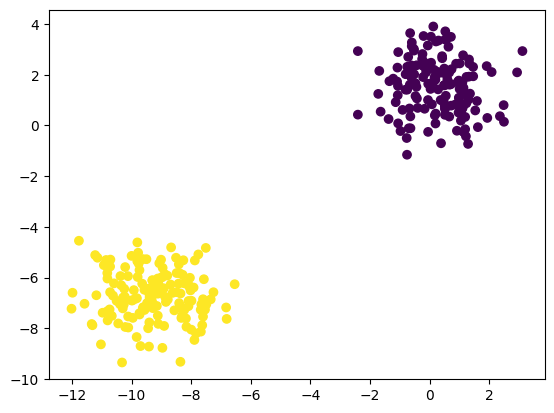

In [96]:
# Utilizando MatPlotLib
plt.scatter(features['X1'], 
            features['X2'],
            c = y) # Usar la y para color

In [97]:
# Utilizando Plotly Express
fig = px.scatter(x = features['X1'], 
                 y = features['X2'], 
                 color = y,
                 width = 600,
                 height = 500)
fig.show()

### Para graficar con MatPlotLib en 3-D

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [98]:
from mpl_toolkits.mplot3d import Axes3D

In [99]:
# Si se tiene la última versión de Jupyter NB
#%matplotlib notebook

%matplotlib inline

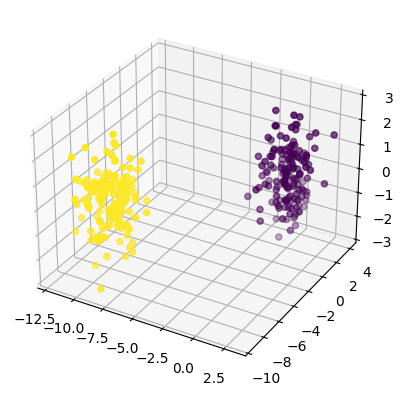

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'],
           features['X2'],
           features['X3'],
           c = y)

### 3D con Plotly Express

Si se gira para visualizar bien los dos clusters, se vé que el ruido (z) no discrimina los dos grupos, más o menos tiene el mismo rango

In [101]:
fig = px.scatter_3d(x = features['X1'], 
                    y = features['X2'], 
                    z = features['X3'],
                    color = y,
                    width = 600, height = 500)
fig.show()

# Codificador y Decodificador

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [103]:
# 3 --> 2
codificador = Sequential()
codificador.add(Dense(units = 2,
                      activation = 'relu',
                      input_shape = [3]))

In [104]:
# 2 ---> 3
decodificador = Sequential()
decodificador.add(Dense(units = 3,
                        activation = 'relu',
                        input_shape = [2]))

### Ahora se crea el autocodificador completo

#### Se utilizará el optimizador *Stochastic Gradient Descent* porque permite "jugar" con la tasa de aprendizaje *lr* (learning rate)

In [105]:
from tensorflow.keras.optimizers import SGD

In [106]:
# Autocodificador
# 3 ---> 2 ----> 3
autocodificador = Sequential([codificador,
                              decodificador])

### Compilación del Autocodificador

In [107]:
autocodificador.compile(loss = "mse",
                        optimizer = SGD(lr = 1.5))

### Normalización de los datos

#### Nota:  se usarán todos los datos!  No tiene sentido usar datos de entrenamiento y de prueba ya que no hay una respuesta correcta en esto.

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
normalizador = MinMaxScaler()
datos_normalizados = normalizador.fit_transform(features)

In [110]:
datos_normalizados

array([[2.07475524e-01, 1.95571963e-01, 9.85845750e-01],
       [8.35929679e-01, 9.39652004e-01, 6.09403243e-01],
       [7.78344698e-01, 9.18055791e-01, 6.60079904e-01],
       [2.76123683e-01, 8.64187747e-02, 5.86892040e-01],
       [6.89943218e-02, 1.48018660e-01, 6.13565724e-01],
       [7.93328662e-02, 2.66181866e-01, 4.37825912e-01],
       [8.58345111e-01, 7.43675286e-01, 3.42071017e-01],
       [1.13649812e-01, 1.61015757e-01, 6.05388874e-01],
       [7.97071012e-01, 9.69575837e-01, 1.30174900e-01],
       [8.04420781e-01, 8.70758874e-01, 6.29683804e-01],
       [1.45851346e-01, 3.01543367e-01, 5.91417162e-01],
       [5.50858487e-02, 2.00066208e-01, 3.88988121e-01],
       [8.28535567e-01, 9.61146391e-01, 5.29823913e-01],
       [2.59466086e-01, 1.83035970e-01, 3.58225464e-01],
       [8.67698238e-01, 7.58466630e-01, 3.26649038e-01],
       [2.98886547e-01, 1.72814182e-01, 6.68607073e-01],
       [7.44511367e-01, 8.79978328e-01, 5.30204031e-01],
       [8.41866546e-01, 8.28631

### Entrenamiento del Autocodificador

#### Nota:  La entrada y la salida son lo mismo

In [111]:
autocodificador.fit(datos_normalizados,
                    datos_normalizados,
                    epochs = 5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2073
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1921
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1700


### Si se quieren ver las dos dimensiones a las que redujo el codificador

In [112]:
codificado_2dim = codificador.predict(datos_normalizados)

10/10 [==============================] - 0s 1ms/step


In [113]:
codificado_2dim.shape

(300, 2)

In [114]:
codificado_2dim

array([[0.        , 0.66524917],
       [0.        , 0.67466474],
       [0.        , 0.73018104],
       [0.        , 0.26899722],
       [0.        , 0.5205934 ],
       [0.        , 0.530939  ],
       [0.09679303, 0.3046978 ],
       [0.        , 0.4915462 ],
       [0.02470484, 0.46352178],
       [0.        , 0.6430435 ],
       [0.        , 0.59865916],
       [0.        , 0.45649856],
       [0.        , 0.65711087],
       [0.        , 0.2499606 ],
       [0.10139553, 0.3029828 ],
       [0.        , 0.3840016 ],
       [0.        , 0.64581424],
       [0.        , 0.6972441 ],
       [0.        , 0.8302482 ],
       [0.03684917, 0.39624995],
       [0.        , 0.51675737],
       [0.        , 0.82734305],
       [0.03174255, 0.4596157 ],
       [0.        , 0.19582438],
       [0.        , 0.42555207],
       [0.        , 0.5889849 ],
       [0.        , 0.6796214 ],
       [0.06622311, 0.349258  ],
       [0.        , 0.47491735],
       [0.        , 0.45778143],
       [0.

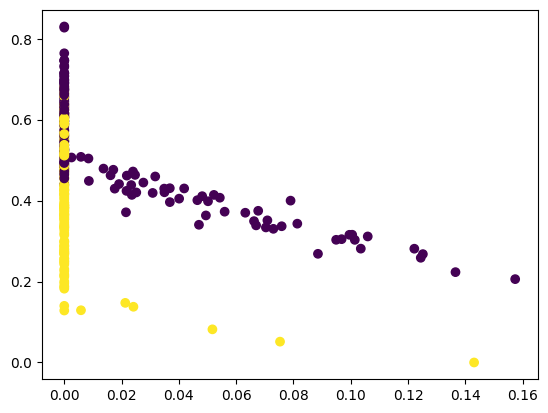

In [115]:
plt.scatter(codificado_2dim[:, 0],
            codificado_2dim[:, 1],
            c = y)

In [116]:
fig = px.scatter(x = codificado_2dim[:, 0], 
                 y = codificado_2dim[:, 1], 
                 color = y,
                 width = 700,
                 height = 500)
fig.show()